# Adding white noise to sine waves (2015.10.09 KT DW)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
%matplotlib inline

In [4]:
def medianFilter( data, windowLength ): 
    if (windowLength < len(data)and data.ndim == 1):
        tempret = np.zeros(len(data)-windowLength+1)
        for c in range(0, len(tempret)):
            tempret[c] = np.median( data[ c : c + windowLength ] )
        return tempret
    else:
         raise ValueError("windowLength must be smaller than len(data) and data must be a 1D array")

In [5]:
def medianSinPlot( waveNumber, windowLength ):
    data = np.fromfunction( lambda x: np.sin((x-windowLength / 2)/128 * 2 * np.pi * waveNumber), (128 + windowLength / 2, ) )
    noise = np.random.normal(0,0.2,(128 + windowLength / 2))
    signal = data + noise
    datafiltered = medianFilter(signal, windowLength)
    signal = signal[ windowLength / 2 : - windowLength ]
    datafiltered = datafiltered[ : len(signal) ]
    plt.plot( signal )
    plt.plot( datafiltered )
    plt.plot( signal-datafiltered )  

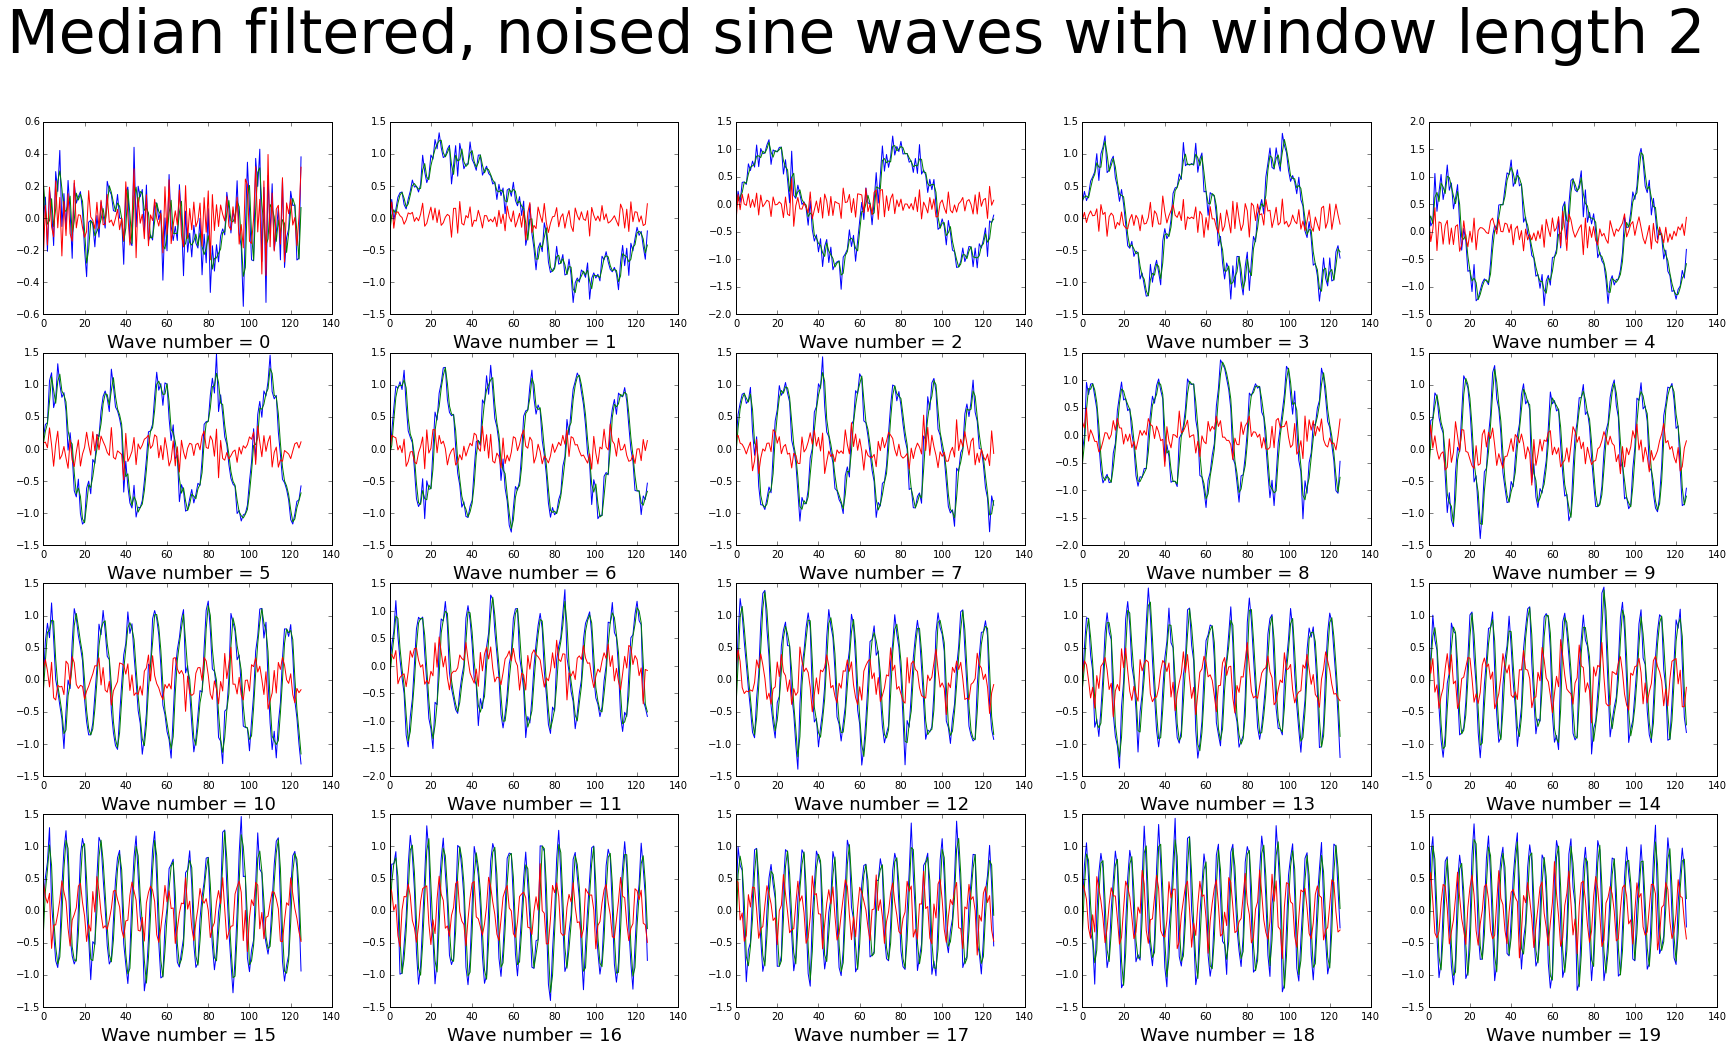

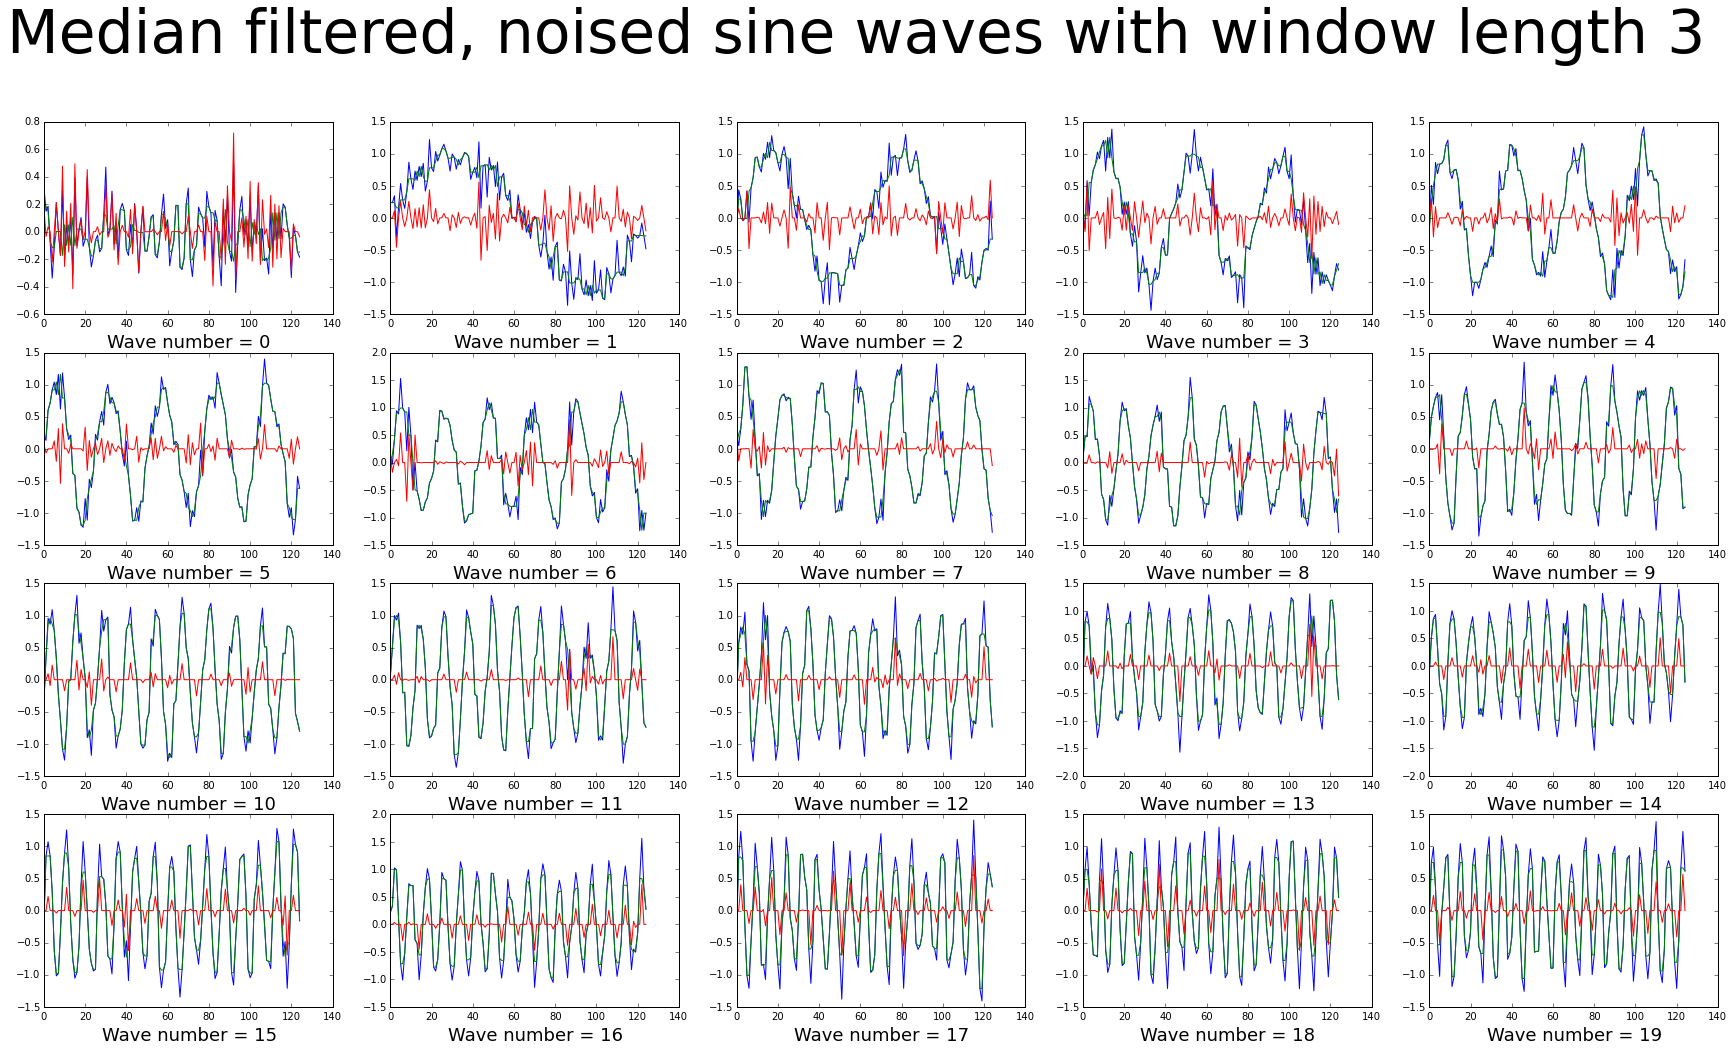

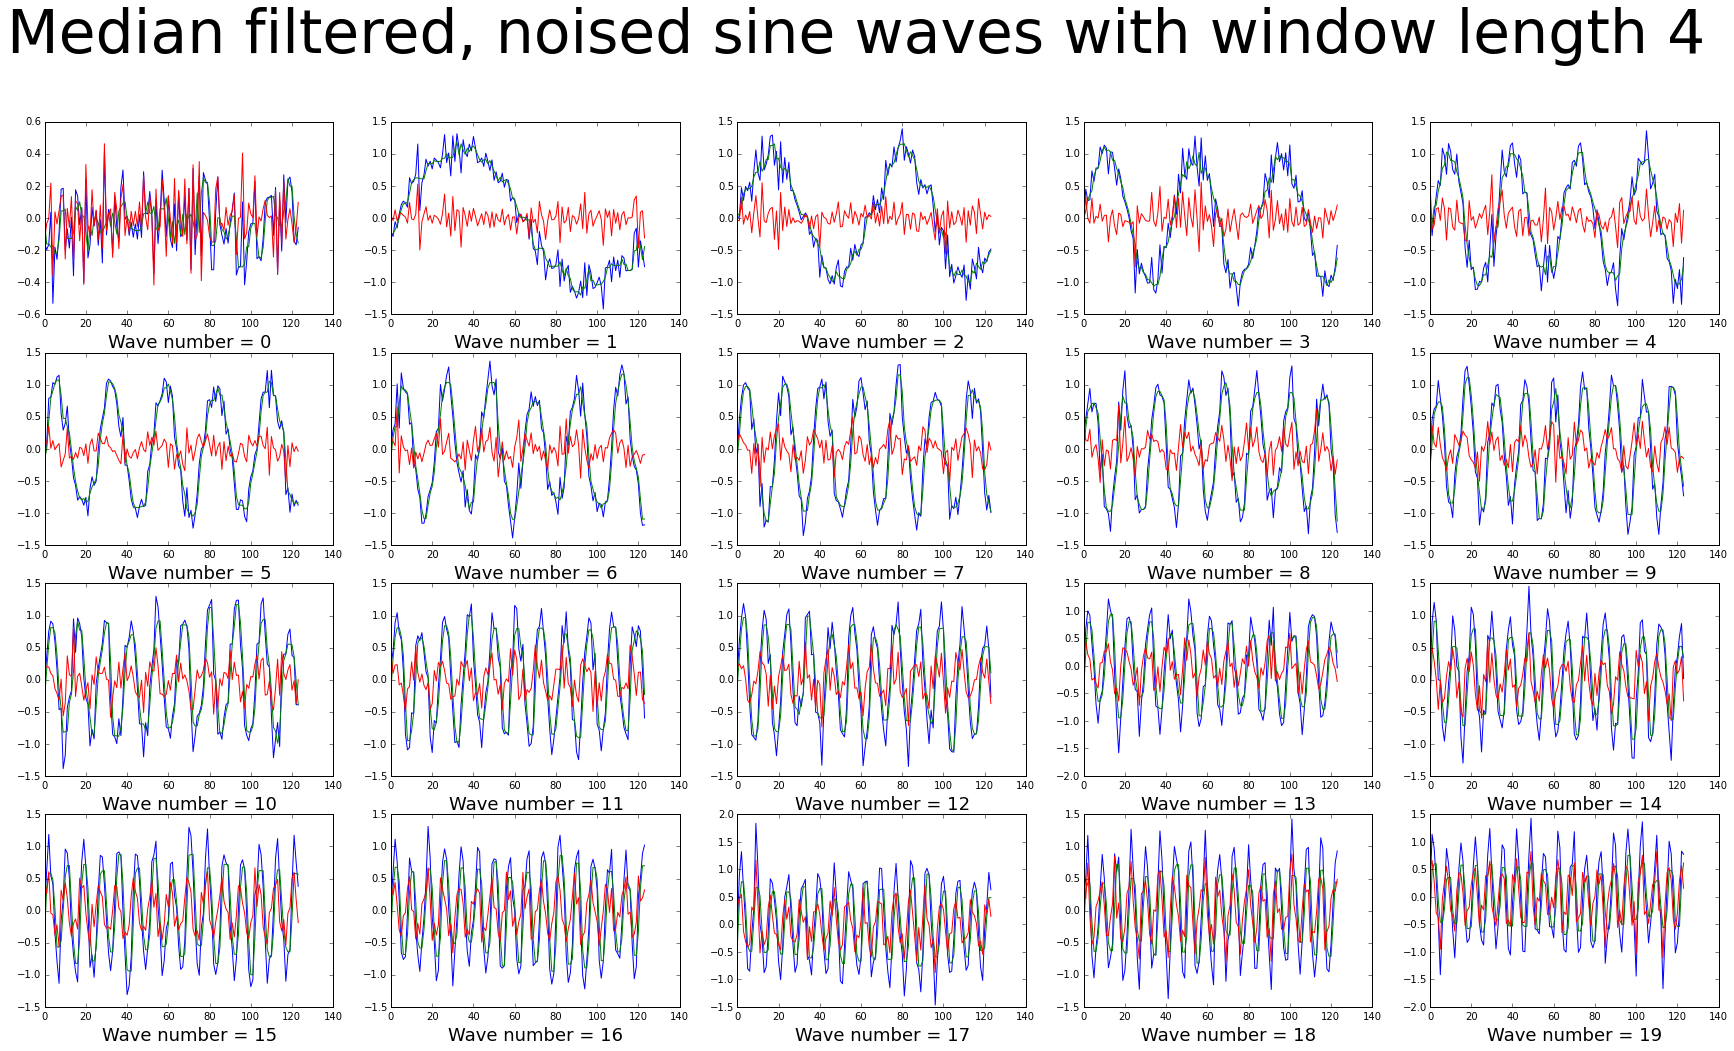

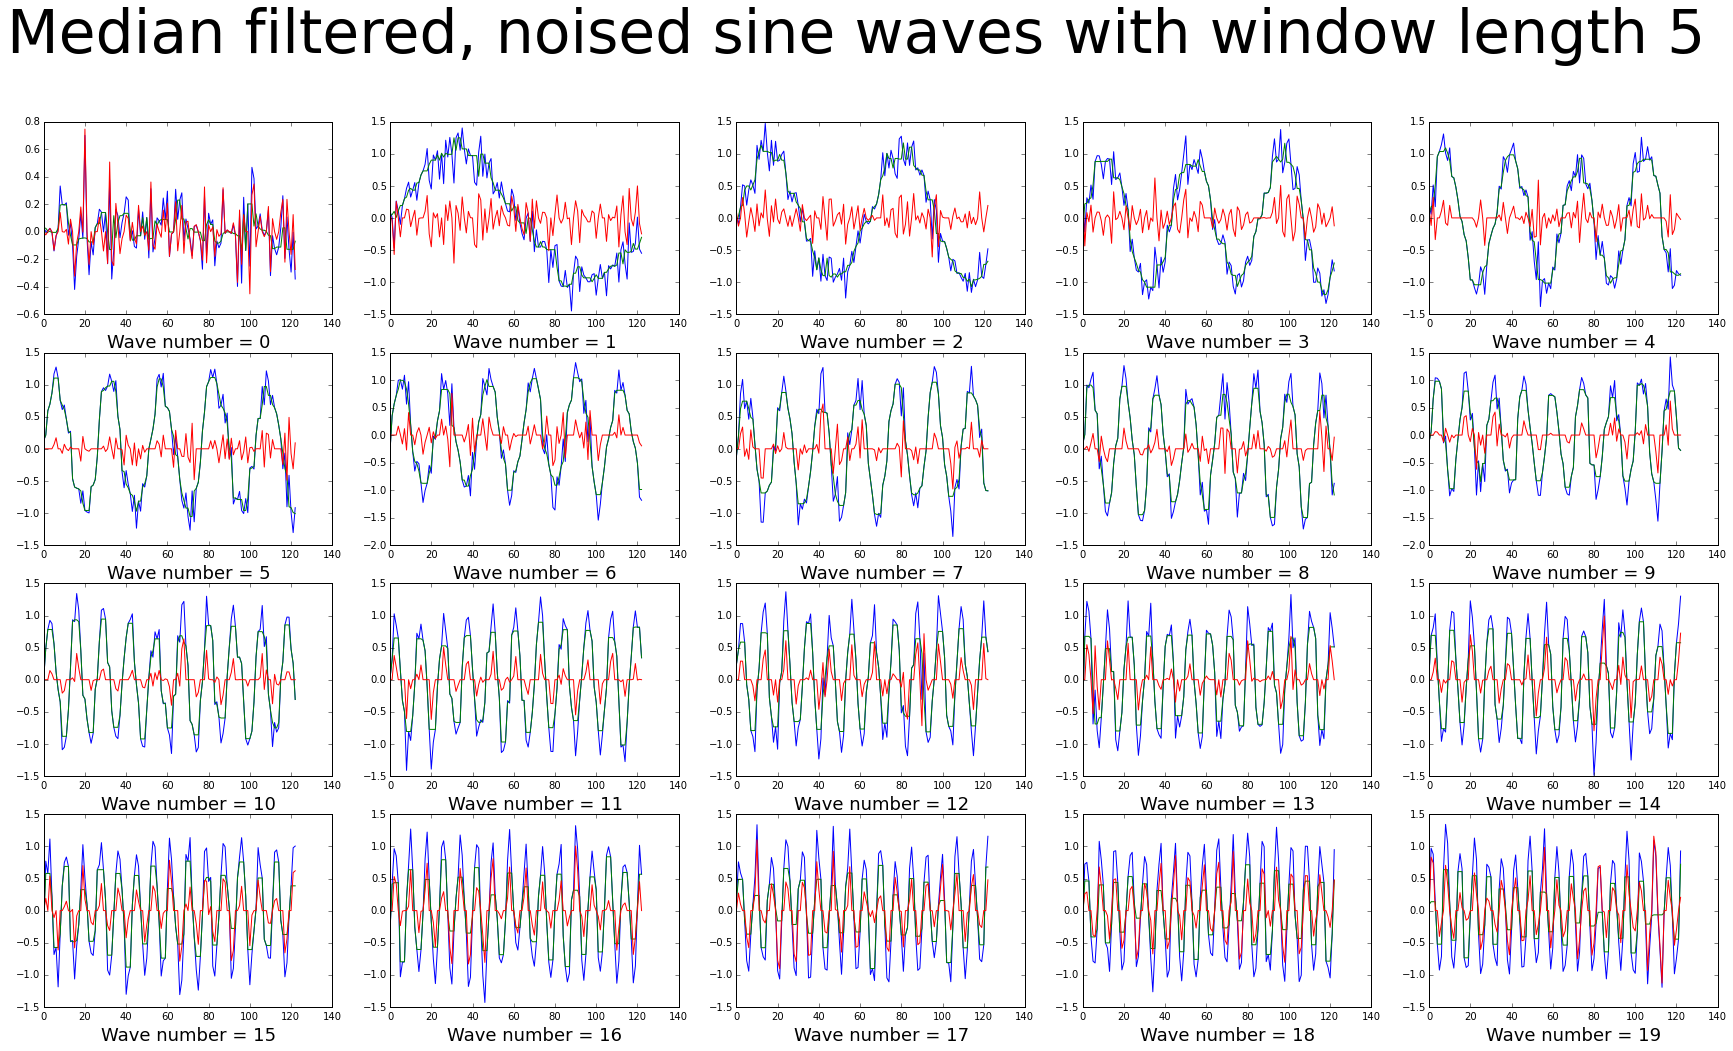

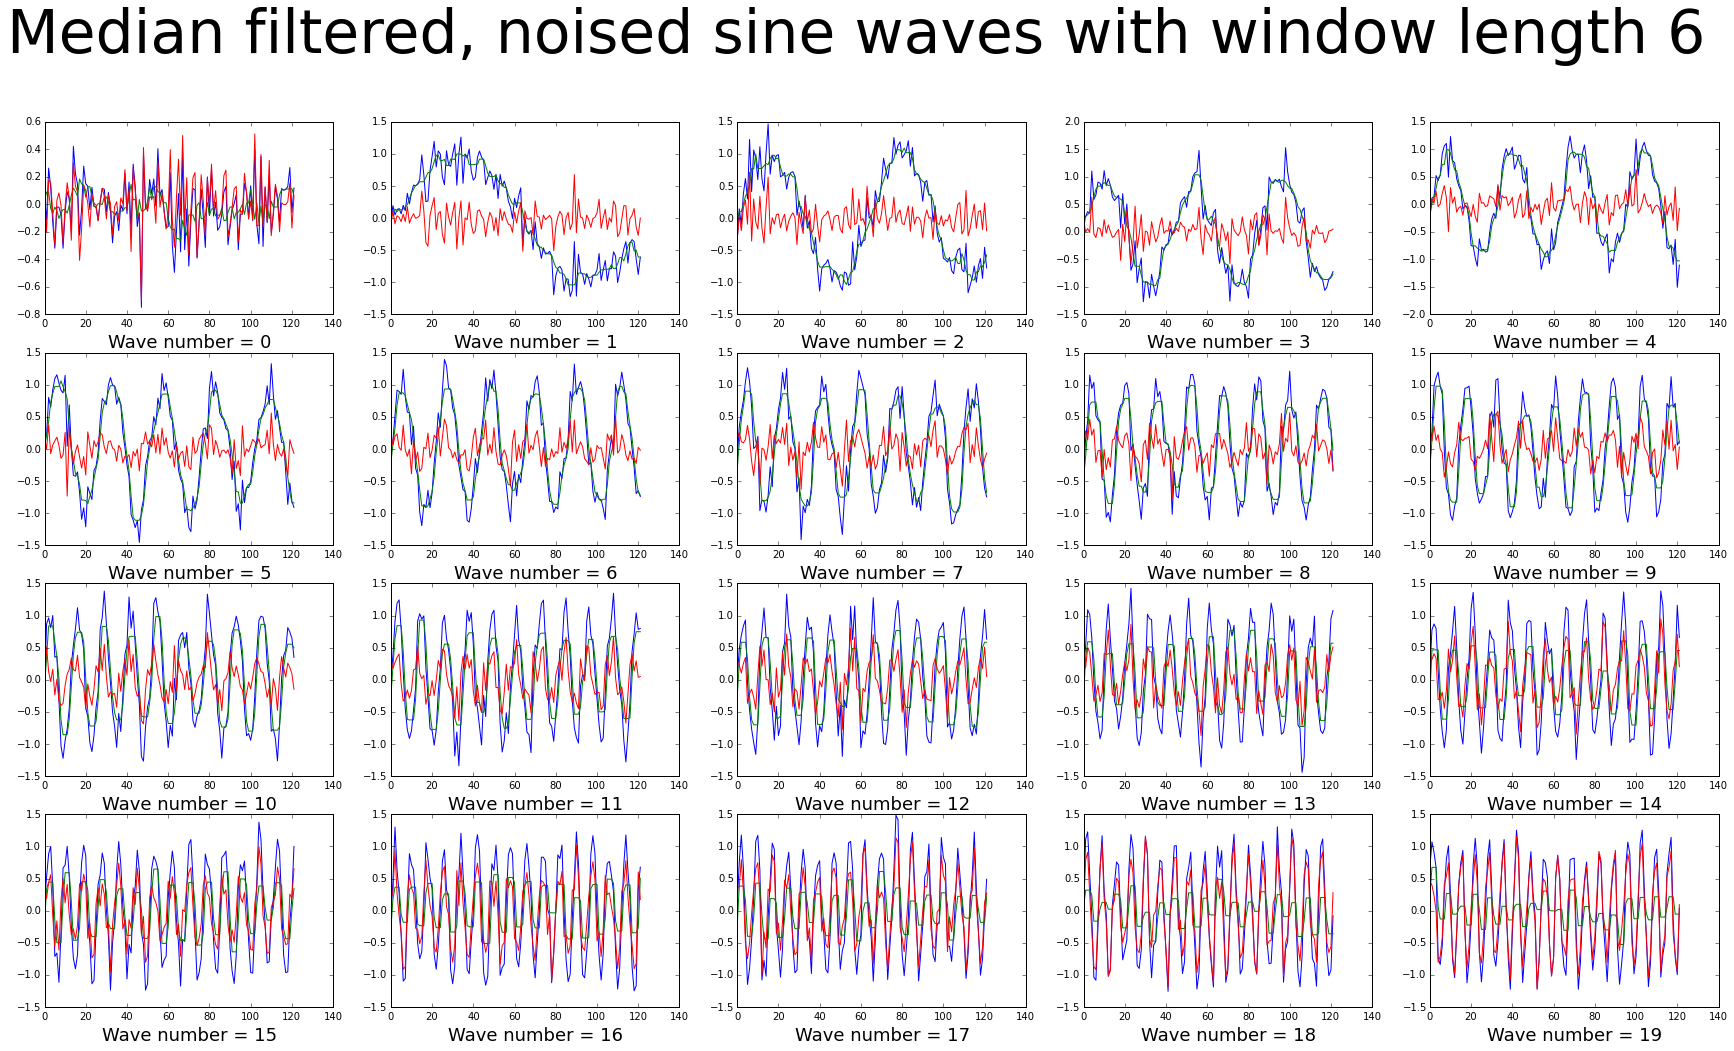

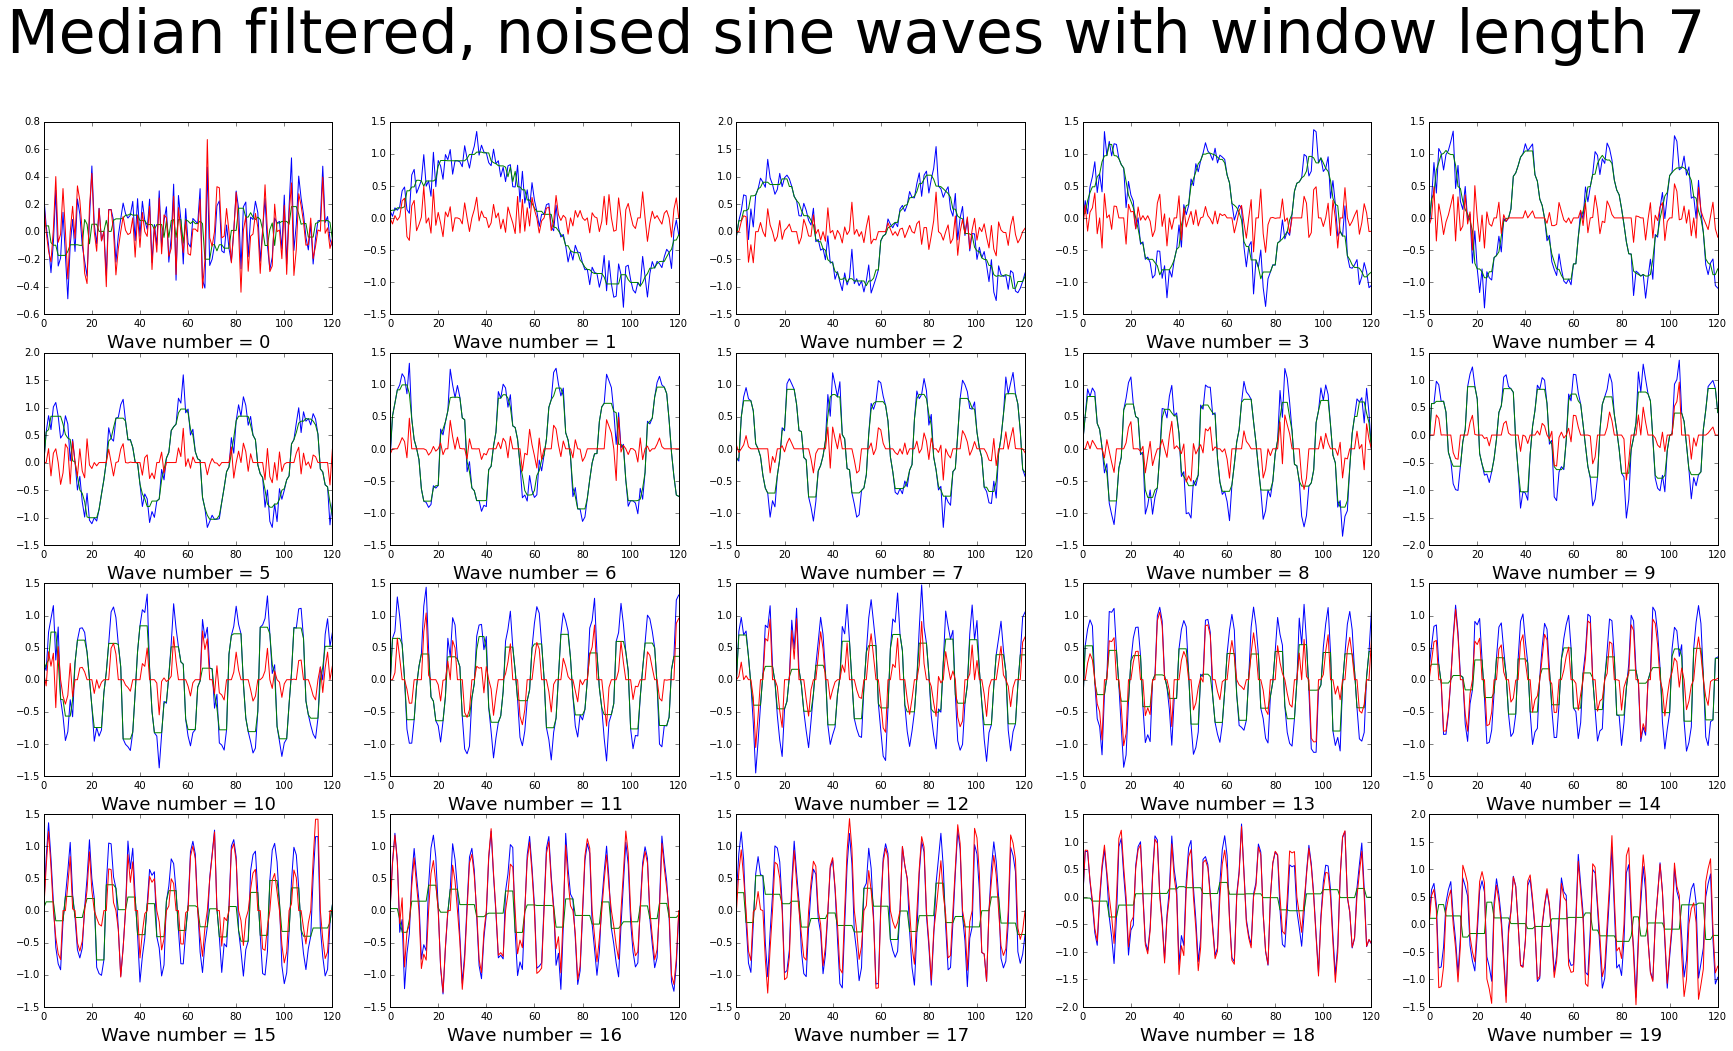

In [6]:
pp = PdfPages( 'median sin with white noise.pdf')
for z in range (2,8):  
    fig = plt.figure(z, figsize=(30,20))
    for x in range(1, 5):
        for y in range(1, 6):
            plt.subplot(5, 5, x + (y-1)*4)
            wavenum = (x-1) + (y-1)*4
            medianSinPlot( wavenum, z )
            plt.suptitle('Median filtered, noised sine waves with window length ' + str(z), fontsize = 60)
            plt.xlabel(("Wave number = "+str((x-1) + (y-1)*4)), fontsize=18)
    pp.savefig(fig)
pp.close()